In [ ]:
import pandas as pd, numpy as np, re, time
from nltk.stem.porter import PorterStemmer
import io

In [ ]:
import pandas as pd, numpy as np, re, time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
import pickle

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Sarcasm_Headlines_Dataset.json to Sarcasm_Headlines_Dataset.json


In [ ]:
# Loading data from json file
data = pd.read_json(io.BytesIO(uploaded['Sarcasm_Headlines_Dataset.json']), lines = True)

In [ ]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
#to check if dataset has any null values
print(data.isnull().any(axis = 0))

article_link    False
headline        False
is_sarcastic    False
dtype: bool


In [ ]:
# Relacing special symbols and digits in headline column
# re stands for Regular Expression
data['headline'] = data['headline'].apply(lambda s : re.sub('[^a-zA-Z]', ' ', s))

In [ ]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the roseanne revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son s web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,boehner just wants wife to listen not come up...,1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j k rowling wishes snape happy birthday in th...,0


Text(0.5, 1.0, 'Proportion Target Class')

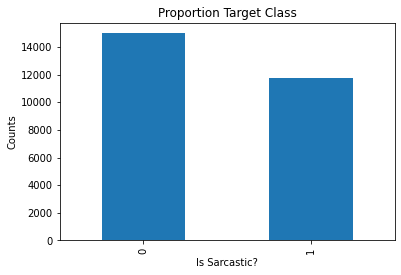

In [ ]:
import matplotlib.pyplot as plt
data["is_sarcastic"].value_counts().plot(kind='bar')
plt.xlabel("Is Sarcastic?")
plt.ylabel("Counts")
plt.title("Proportion Target Class")

In [ ]:
positive = data[data.is_sarcastic == 1]
negative = data[data.is_sarcastic == 0]

positive_words =[]

for data in positive.headline:
    positive_words.append(data) 
positive_words = ' '.join(positive_words)
positive_words[:48]


'mom starting to fear son s web series closest th'

In [ ]:

negative_words = []

for data in negative.headline:
    negative_words.append(data)
negative_words = ' '.join(negative_words)
negative_words[:455]

'former versace store clerk sues over secret  black code  for minority shoppers the  roseanne  revival catches up to our thorny political mood  for better and worse j k  rowling wishes snape happy birthday in the most magical way advancing the world s women the fascinating case for eating lab grown meat this ceo will send your kids to school  if you work for his company friday s morning email  inside trump s presser for the ages airline passengers tack'

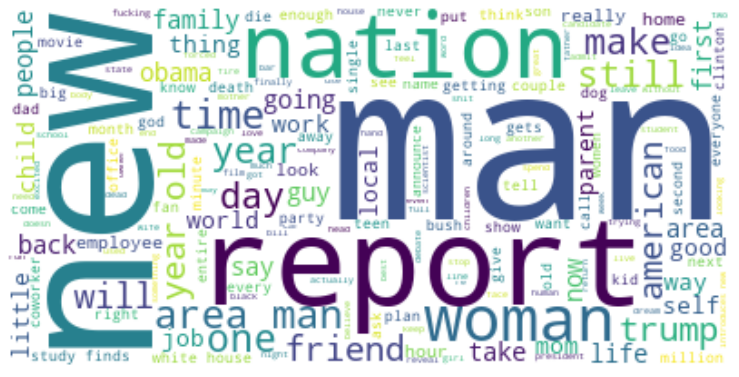

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

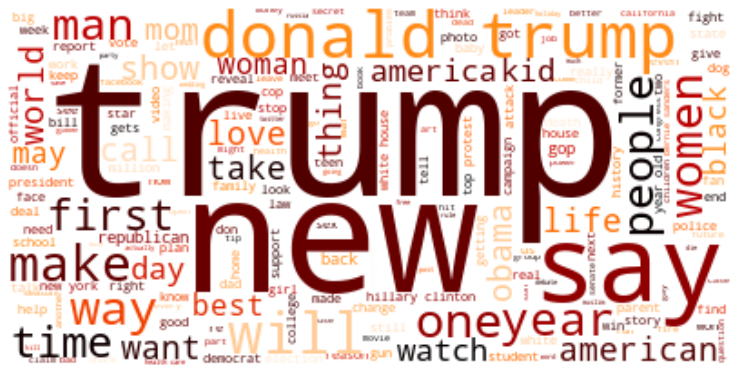

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# getting features and labels
features = data['headline']
labels = data['is_sarcastic']

In [ ]:
# Stemming our data
ps = PorterStemmer()
features = features.apply(lambda x: x.split())
features = features.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

In [ ]:
# vectorizing the data with maximum of 5000 features
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 5000)
features = list(features)
features = tv.fit_transform(features).toarray()

In [ ]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the roseanne revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son s web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,boehner just wants wife to listen not come up...,1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j k rowling wishes snape happy birthday in th...,0


In [ ]:
# getting training and testing data
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = .05, random_state = 0)

In [ ]:
# Using linear support vector classifier
lsvc = LinearSVC()
# training the model
lsvc.fit(features_train, labels_train)
# getting the score of train and test data
print(lsvc.score(features_train, labels_train)) # 90.93
print(lsvc.score(features_test, labels_test))   # 83.75

0.9093524612777362
0.8375748502994012


In [ ]:
# getting confusion matrix
print("Confusion Matrix")
print(confusion_matrix(labels_test, labels_pred))

Confusion Matrix
[[640 106]
 [111 479]]


In [ ]:
print("Classification Report")
print(classification_report(labels_test, labels_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       746
           1       0.82      0.81      0.82       590

    accuracy                           0.84      1336
   macro avg       0.84      0.83      0.84      1336
weighted avg       0.84      0.84      0.84      1336



In [ ]:
labels_pred = lsvc.predict(features_test)

# getting cross validation score
cvs = cross_val_score(estimator = lsvc, X = features_train, y = labels_train, cv = 10)

#print("Precision: ", precision_score(labels_test, labels_pred))
#print("Recall:", recall_score(labels_test, labels_pred))

# getting mean score
print("Accuracy: ",cvs.mean() * 100, "%")

# saving the model in disk for later use
with open('model.pkl', 'wb') as f:
    pickle.dump(lsvc, f)

# saving the model in disk for later use
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tv, f)

Accuracy:  82.99373837729578 %


In [ ]:
s1=["A man cleans his apartment once every relationship"]
s2=["Could hillary clinton have what it takes to defeat the democrats in 2008?"]
data1=tv.transform(s1).toarray()
data2=tv.transform(s2).toarray()
a1=lsvc.predict(data1)
a2=lsvc.predict(data2)
print(s1,":",a1[0])
print(s2,":",a2[0])

['A man cleans his apartment once every relationship'] : 1
['Could hillary clinton have what it takes to defeat the democrats in 2008?'] : 0
